## Часть 1. Парсинг (10 баллов)

Мы предлагаем вам распарсить часть данных litres.ru — а именно часть про книги, имеющие отношение к программированию.

Они находятся в этом каталоге: https://www.litres.ru/genre/programmirovanie-5272/

Вам нужно собрать датасет о книгах с первых 40-ти страниц каталога (около 960 книг.)
*Подсказка.* Можете начать с исследования html кода этой страницы.

Вам необходимо собрать датасет, содержащий следующие данные:
* name: название книги
* author: автор
* link: ссылка на книгу
* rating: рейтинг по 5-балльной шкале
* rating_count: количество оценок
* review_count: количество отзывов
* pages_count: объем (число страниц)
* price: цена
* text_reviews: тексты отзывов: список строк
* age: возрастное ограничение
* year: год написания

В дальнейшем вам нужно будет анализировать полученный у вас датасет.

Если у вас не получилось спарсить датасет, воспользуйтесь для последующих пунктов готовым датасетом: https://disk.yandex.ru/d/2UZet2-qxRxF6Q

 Так вы сможете получить баллы за вторую часть.

(Датасет неидеален, с ним придется поработать!)

**Парсите "вежливо": используйте time.sleep() не меньше 1-2 секунд между запросами к сайту!**

## Часть 2. EDA (30 баллов)

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?
2. Есть ли в датасете пропуски? (0.5)
3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).
4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

8. Выведите топ-10 книг по числу отзывов. (2).

9. Найдите среднюю длину отзыва (в символах). (2)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
data=pd.read_csv('/content/drive/MyDrive/HSE/1MODUL/Распределительные тесты/Python/litres_programming_data.csv')

In [62]:
data.drop(columns=['Unnamed: 0'], inplace=True)

##1

In [45]:
#Выведите первые 5 строк датасета. (0.25)
data.head()

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
2,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
3,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
4,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


In [14]:
#Сколько в нём строк и столбцов (0.25)
data.shape

(965, 12)

##2

In [46]:
#Есть ли в датасете пропуски? (0.5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             965 non-null    object 
 1   author           965 non-null    object 
 2   link             965 non-null    object 
 3   rating           965 non-null    float64
 4   rating_count     965 non-null    int64  
 5   review_count     965 non-null    int64  
 6   price            965 non-null    float64
 7   pages            965 non-null    object 
 8   pages_count      965 non-null    int64  
 9   text_of_reviews  965 non-null    object 
 10  age              965 non-null    object 
 11  year             965 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 90.6+ KB


##3

In [78]:
#Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).


#уберем знак + из колонки возраст, чтобы привести к числовому формату
data['age']=data['age'].apply(lambda x: x[:-1])


#распределим столбцы по типам
int32_cols = ['rating_count', 'review_count', 'pages_count', 'year', 'age']
float32_cols = ['rating', 'price']
object_cols = ['name', 'author', 'link', 'pages', 'text_of_reviews']

#поменяем тип на соответствующий
data[int32_cols] = data[int32_cols].astype('int32')
data[float32_cols] = data[float32_cols].astype('float32')
data[object_cols] = data[object_cols].astype('object')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             965 non-null    object 
 1   author           965 non-null    object 
 2   link             965 non-null    object 
 3   rating           965 non-null    float32
 4   rating_count     965 non-null    int32  
 5   review_count     965 non-null    int32  
 6   price            965 non-null    float32
 7   pages            965 non-null    object 
 8   pages_count      965 non-null    int32  
 9   text_of_reviews  965 non-null    object 
 10  age              965 non-null    int32  
 11  year             965 non-null    int32  
 12  is_popular       965 non-null    int64  
 13  len_review       965 non-null    int64  
dtypes: float32(2), int32(5), int64(2), object(5)
memory usage: 79.3+ KB


**БЫЛО:**

dtypes: float64(2), int64(4), object(6)
memory usage: 90.6+ KB
***

**СТАЛО:**

dtypes: float32(2), int32(5), object(5)
memory usage: 64.2+ KB

##4

In [48]:
#Выведите описательные статистики переменных. Ответьте на следующие вопросы:
data.describe()

,rating,rating_count,review_count,price,pages_count,age,year
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,2.543420,10.338860,1.603109,348.744049,222.014508,4.800000,2016.327461
std,2.193727,36.058249,3.134103,279.907684,236.922129,6.650617,5.646624
min,0.000000,0.000000,0.000000,40.000000,2.000000,0.000000,1985.000000
25%,0.000000,0.000000,0.000000,129.000000,12.000000,0.000000,2012.000000
50%,3.600000,1.000000,0.000000,200.000000,163.000000,0.000000,2017.000000
75%,4.600000,6.000000,2.000000,549.000000,362.000000,12.000000,2021.000000
max,5.000000,433.000000,37.000000,2200.000000,1223.000000,18.000000,2024.000000


In [49]:
data.describe(include=["object"])

,name,author,link,pages,text_of_reviews
count,965,965,965,965,965
unique,964,730,965,442,429
top,Математическая логика и теория алгоритмов,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,8 стр.,[]
freq,2,14,1,42,537


In [50]:
#Какая медианная цена книги в вашем датасете? (1)
#200.000000

#Какое возрастное ограничение встречается чаще всего? (1)
#0+ (622 раза)
data['age'].value_counts()

,count
age,
0,622
12,177
16,144
6,16
18,6


In [51]:
#Какое среднее число отзывов в книге? (1)
data['review_count'].mean()

1.6031088082901555

In [52]:
#Сколько книг имеют оценку ниже 4.25? (1)
len(data[data['rating'] < 4.25])

619

In [53]:
#В каком году было написано больше всего книг из датасета? (1)
#В 2021
data['year'].value_counts()

,count
year,
2021,91
2023,85
2022,71
2020,68
2013,60
2010,56
2014,56
2017,54
2019,53


##5

In [54]:
#Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц.
#Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count.
#Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)


data['pages'].apply(lambda x: x.split()[0])

,pages
0,102
1,831
2,130
3,10
4,166
...,...
960,223
961,345
962,16
963,576


##6

In [63]:
#Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)
data['is_popular'] = 0
for i in range(len(data)):
  if data.rating.iloc[i]>=4.6 and data.review_count.iloc[i]>=5:
    data['is_popular'].iloc[i]=1

data

<ipython-input-63-590e05f5f3d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_popular'].iloc[i]=1
<ipython-input-63-590e05f5f3d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_popular'].iloc[i]=1
<ipython-input-63-590e05f5f3d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_popular'].iloc[i]=1
<ipython-input-63-590e05f5f3d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023,1
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023,0
2,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019,0
3,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021,0
4,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,Основы вычислений и программирования в пакете ...,а. ф. задорожный,https://www.litres.ru/book/a-f-zadorozhnyy/osn...,0.0,0,0,676.0,223 стр.,223,[],0+,2023,0
961,Справочник Жаркова по проектированию и програм...,Валерий Алексеевич Жарков,https://www.litres.ru/book/valeriy-zharkov-324...,0.0,0,0,990.0,345 стр. 93 иллюстрации,345,[],12+,2023,0
962,Применение компьютерных систем моделирования т...,П. А. Кулагин,https://www.litres.ru/book/a-v-mischenko/prime...,0.0,0,0,168.0,16 стр.,16,[],0+,2017,0
963,Основы TypeScript (pdf+epub),Адам Фримен,https://www.litres.ru/book/adam-frimen/osnovy-...,0.0,0,0,699.0,576 стр.,576,[],16+,2023,0


In [64]:
len(data[data.is_popular == 1])

32

##7

In [65]:
#Как отличается среднее число страниц среди популярных и непопулярных книг? (2)
#Популярные книги в среднем на 164 страницы больше
data.groupby(['is_popular']).agg({'pages_count':'mean'})

,pages_count
is_popular,
0,216.564845
1,380.906250


##8

In [67]:
#Выведите топ-10 книг по числу отзывов. (2).
data.sort_values(by='review_count', ascending=False).head(10)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023,1
775,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,599.0,224 стр.,224,['Прекрасная книга. Рекомендовал и старшим шко...,16+,2017,0
98,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,299.0,210 стр.,210,"['Отличная книга чтобы начать программировать,...",12+,2017,0
692,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,377,19,690.0,231 стр. 20 иллюстраций,231,['Отличная серия! Обложки просто кайф. Много п...,12+,2023,1
494,"Изучаем Python: программирование игр, визуализ...",Эрик Мэтиз,https://www.litres.ru/book/erik-metiz/izuchaem...,4.3,74,18,699.0,512 стр.,512,"['Осторожно, под видом второго издания продает...",16+,2021,0
528,"Swift. Основы разработки приложений под iOS, i...",Василий Усов,https://www.litres.ru/book/vasiliy-usov/swift-...,3.1,64,17,499.0,545 стр.,545,['Книга хорошая. Все подробно описано. Единств...,16+,2021,0
89,Облачные технологии. Практическое руководство ...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/oblac...,5.0,268,17,690.0,212 стр. 5 иллюстраций,212,['Автор не перестает радовать годными книгами....,12+,2024,1
458,Путь лидера,Джейд Картер,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,173,17,199.0,215 стр. 10 иллюстраций,215,['Отличное руководство. Расписан каждый шаг. Д...,12+,2023,1
481,Программирование на C++ в примерах и задачах,Алексей Васильев,https://www.litres.ru/book/aleksey-nikolaevich...,4.0,78,16,419.0,369 стр.,369,"['Я купил эту книгу в бумажном виде, прочитав ...",12+,2017,0
947,1С:Программирование для начинающих. Детям и ро...,м. г. радченко,https://www.litres.ru/book/m-g-radchenko/1s-pr...,4.0,64,15,550.0,781 стр.,781,['Эту книгу я бы рекомендовала самой первой к ...,12+,2022,0


##9

In [75]:
#Найдите среднюю длину отзыва (в символах). (2)
data['len_review']=data['text_of_reviews'].apply(lambda x: len(x))
data['len_review'].mean()

445.6300518134715

##10

<Axes: >

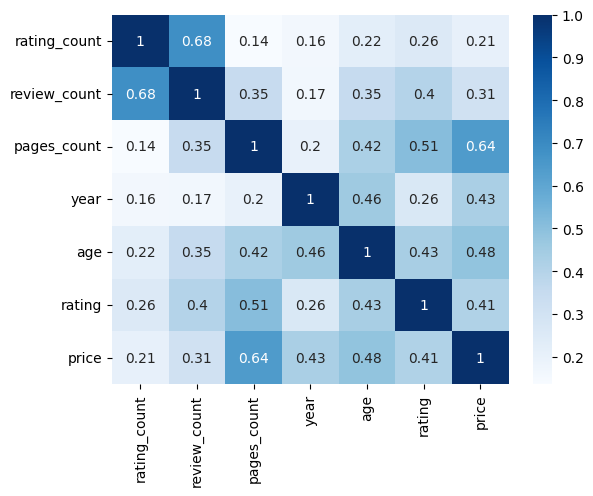

In [79]:
#Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)
import seaborn as sns

corr = data[int32_cols+float32_cols].corr() # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

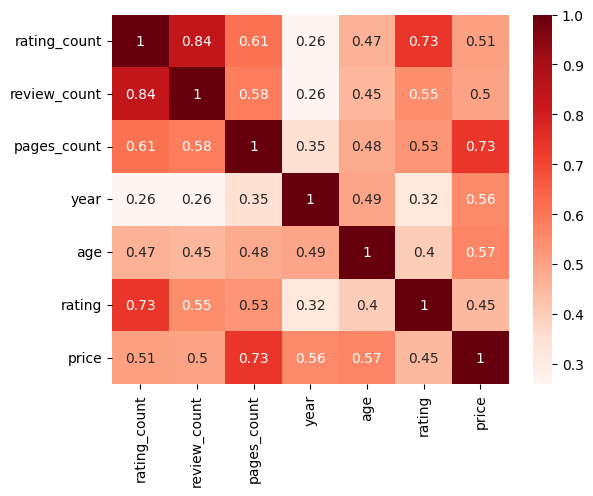

In [80]:
corr = data[int32_cols+float32_cols].corr(method='spearman') # матрица корреляций

sns.heatmap(corr, cmap="Reds", annot=True)

**РЕЗУЛЬТАТЫ:**
***
**Синим** цветом построена матрица корреляций числовых признаков по методу **Пирсона**.
- Наибольшая корреляция между количеством отзывов и количеством выставленных оценок (логично, если человек отставил отзыв, то скорее всего и оценку поставил) , и между ценой и количеством страниц в книге (тоже логично: толстые книжки дороже).

- В меньшей степени цена книги зависит от возрастных ограничений и от года выпуска.

- Интересно, что рейтинг книг коррелирует с количеством страниц (толстые книжки оценивают выше).

***
**Красным** цветом построена матрица корреляций **Спирмена**.

- Значения коэффициентов корреляции в ней значительно выше, чем в матрице корреляций Пирсона. Значит зависимости больше нелинейные.

- Наибольшая зависимость наблюдается так же между количеством отзывов и количеством оценок, но в данном случае количество оценок так же сильно связано со значением самой оценки.

- Цена по-прежнему больше всего связана с количеством страниц, и в меньшей степени с возрастными ограничениями и годом выпуска.

- Рейтинг книги больше всего связан с количеством оценок (при этом в матрице Пирсона такой взаимосвязи не было), количеством отзывов и количеством страниц в книге.


##11

<Axes: xlabel='pages_count', ylabel='review_count'>

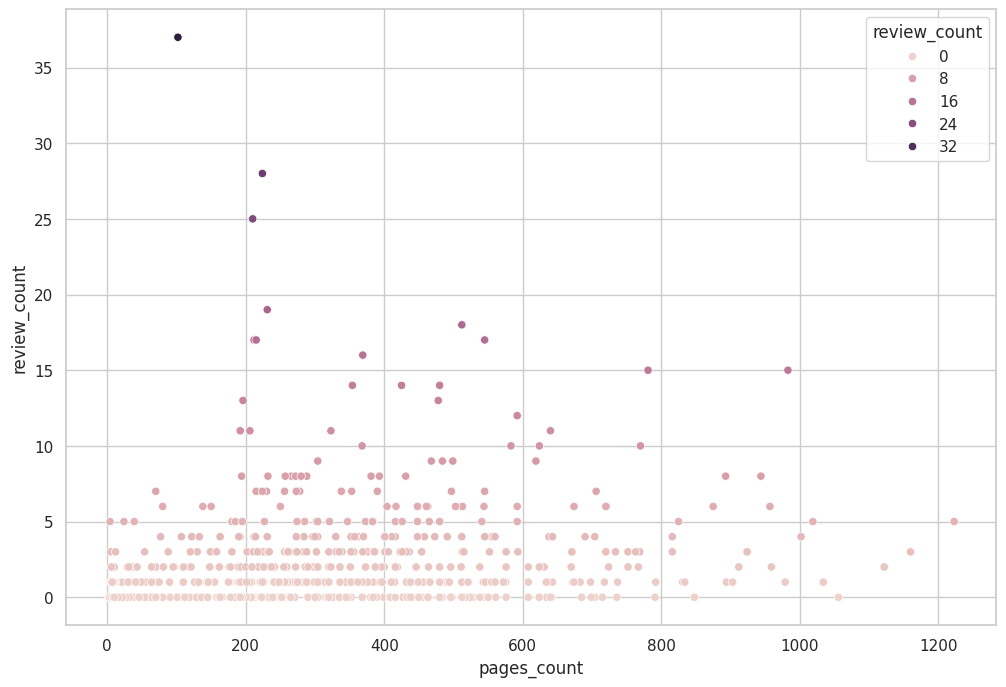

In [94]:
#Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов.
#Не забудьте подписать график и оси. (1)
#Прокомментируйте полученные результаты. (1)
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=data, x="pages_count", y="review_count", hue='review_count')

**ВЫВОДЫ:**
***
- Наибольшее количество отзывов (более 20 отзывов) оставляют книгам, толщиной 170-210 стр.
- Книги, толщиной от 800 стр. имеют не более 7 отзывов (кроме одной)
- Наибольшее количество книг характеризуется размером от 0 до 800 стр. и от 0 до 10 отзывов

##12

<Axes: xlabel='year', ylabel='count'>

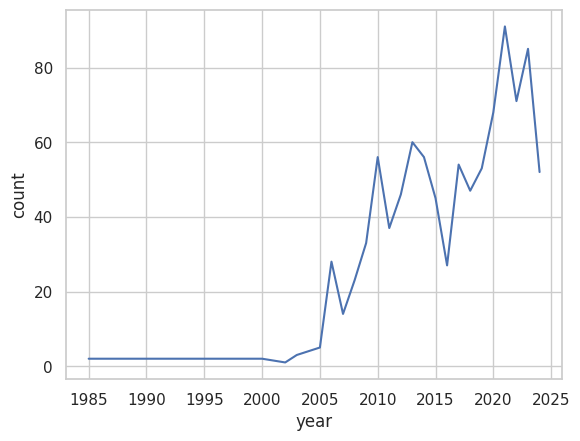

In [93]:
#Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)
sns.set_theme(style="whitegrid")
line_plot = data['year'].value_counts().reset_index()
sns.lineplot(data=line_plot, x='year', y='count')

In [95]:
data['year'].value_counts()

,count
year,
2021,91
2023,85
2022,71
2020,68
2013,60
2010,56
2014,56
2017,54
2019,53


**ВЫВОДЫ:**
***
- Книг, с годом выпуска до 2005г мало - до 5 шт.
- Далее количество книг имеет положительную тенденцию к росту.
- Наблюдается снижение количества книг в 2016г.
- Максимальное количество книг имеет год выпуска 2021


##13

In [110]:
#Постройте еще любые два графика по вашему усмотрению. (2)
#Прокомментируйте полученные результаты. (1.5)

<Axes: xlabel='year', ylabel='Count'>

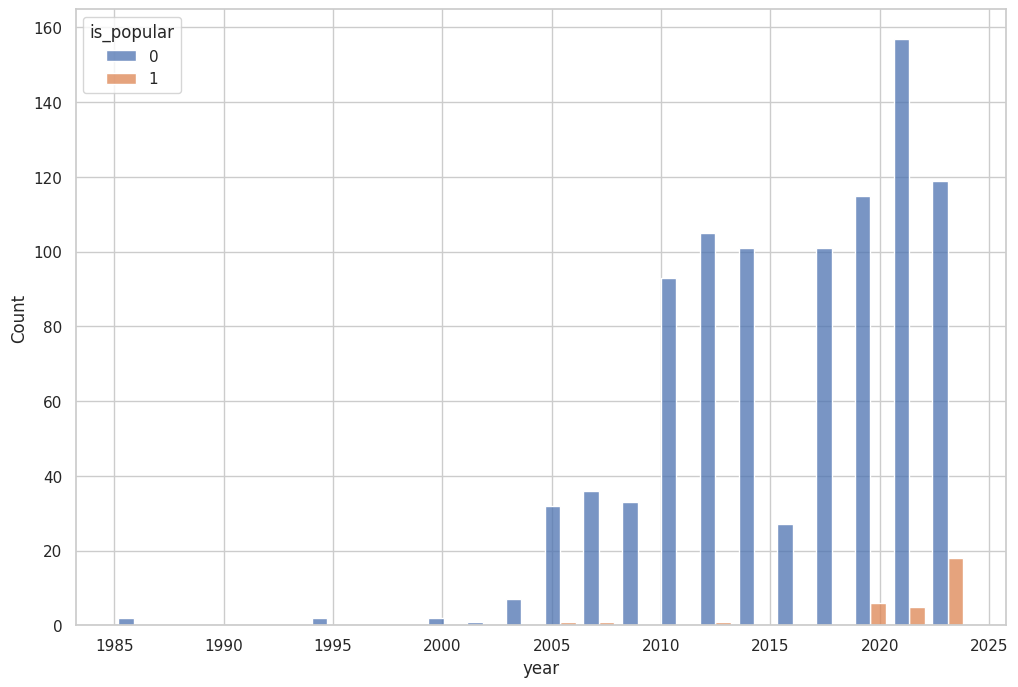

In [109]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="year", hue="is_popular", multiple='dodge', shrink=.8)

**Гистограмма распределения популярных и непопулярных книг по годам**
***
- Видим, что доля популярных книг больше для книг, выпущенных после 2020 г.
- До 2020г очень малая доля книг имеет высокий рейтинг и много комментариев

In [112]:
data

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular,len_review
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12,2023,1,1483
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0,2023,0,174
2,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12,2019,0,1712
3,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0,2021,0,2
4,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0,2020,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,Основы вычислений и программирования в пакете ...,а. ф. задорожный,https://www.litres.ru/book/a-f-zadorozhnyy/osn...,0.0,0,0,676.0,223 стр.,223,[],0,2023,0,2
961,Справочник Жаркова по проектированию и програм...,Валерий Алексеевич Жарков,https://www.litres.ru/book/valeriy-zharkov-324...,0.0,0,0,990.0,345 стр. 93 иллюстрации,345,[],12,2023,0,2
962,Применение компьютерных систем моделирования т...,П. А. Кулагин,https://www.litres.ru/book/a-v-mischenko/prime...,0.0,0,0,168.0,16 стр.,16,[],0,2017,0,2
963,Основы TypeScript (pdf+epub),Адам Фримен,https://www.litres.ru/book/adam-frimen/osnovy-...,0.0,0,0,699.0,576 стр.,576,[],16,2023,0,2


<Axes: xlabel='year', ylabel='price'>

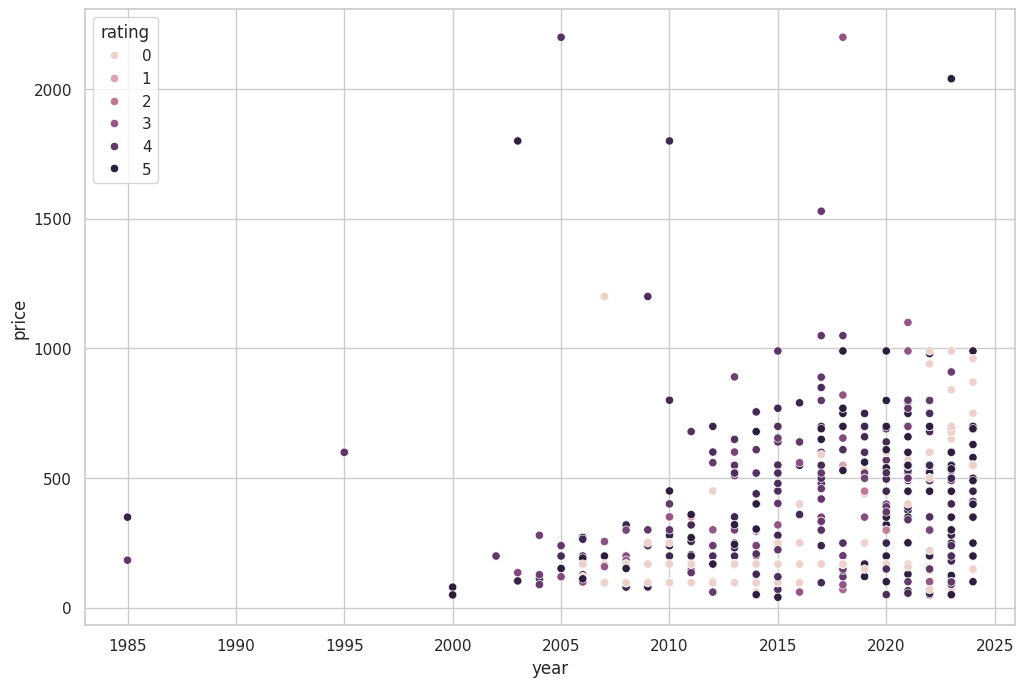

In [114]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="year", y="price", hue="rating")

**График распределения книг по году выпуска, цене и рейтингу**
***
- Книги с низким рейтингом, как правило стоят менее 1000руб (кроме одной) и выпущены после 2005г.
- Все книги, выпущенные до 2005г включительно имеют рейтинг выше 3
- Все книги, стоимость. более 1000 руб выпущены после 2003г и имеют высокий рейтинг (кроме одной)

##14

In [123]:
#Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).
data.groupby(['author']).agg({'name' : 'count', 'rating' : 'mean', 'review_count' : 'mean'})

,name,rating,review_count
author,,,
Arsen Gonian,1,5.0,1.0
C. И. Никишов,1,4.7,3.0
Eugeny Shtoltc,2,2.5,0.0
Jade Carter,1,0.0,0.0
Nulls,1,4.4,6.0
...,...,...,...
Ян Пойнтер,1,3.6,2.0
а. ф. задорожный,1,0.0,0.0
коллектив авторов,5,2.8,0.4


##15

<Axes: xlabel='rating', ylabel='len_review'>

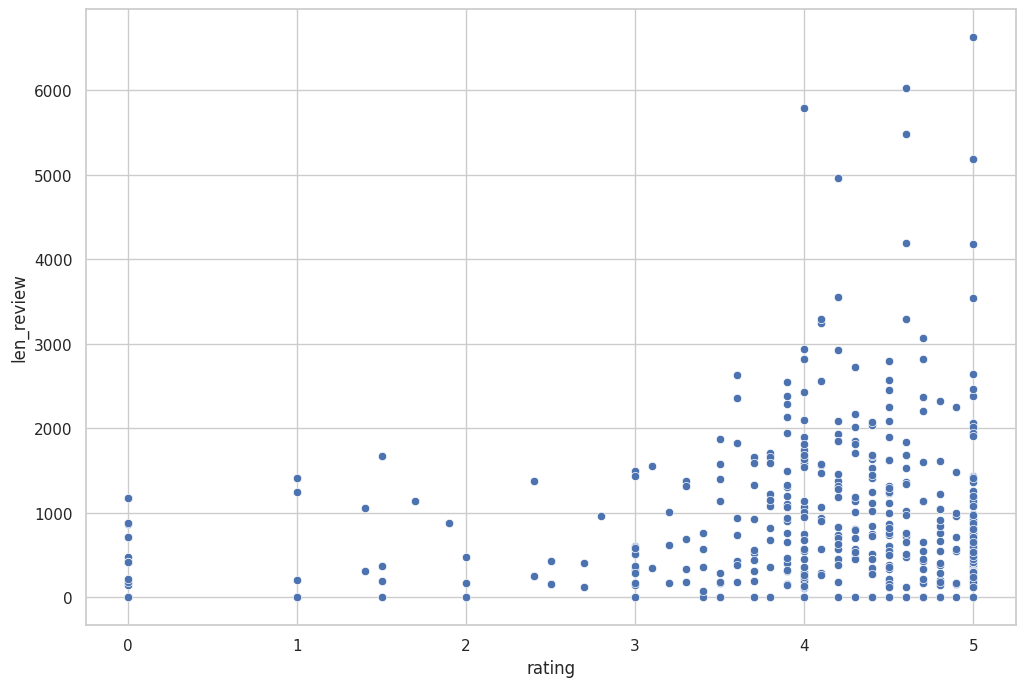

In [122]:
#Что еще интересного можно увидеть в этом датасете?
#Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте.
#Мы никак не ограничиваем вашу фантазию! (3).

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="rating", y="len_review")

**Зависимость рейтинга от длины комментария**
***
- Все низкие рейтинги (<=3) имеют короткие комментарии (менее 2000 символов)
- Самые длинные комментарии (>3000 символов) относятся к книгам с высоким рейтингом (>=4)